# 1. 패키지 임포트

In [20]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 2. 데이터 불러오기 및 확인

In [21]:
df = pd.read_csv('/content/Golf_test.csv')

df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


# 3. 타입별 통계값 확인

In [22]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


# 4. 그룹별 박스플롯 시각화

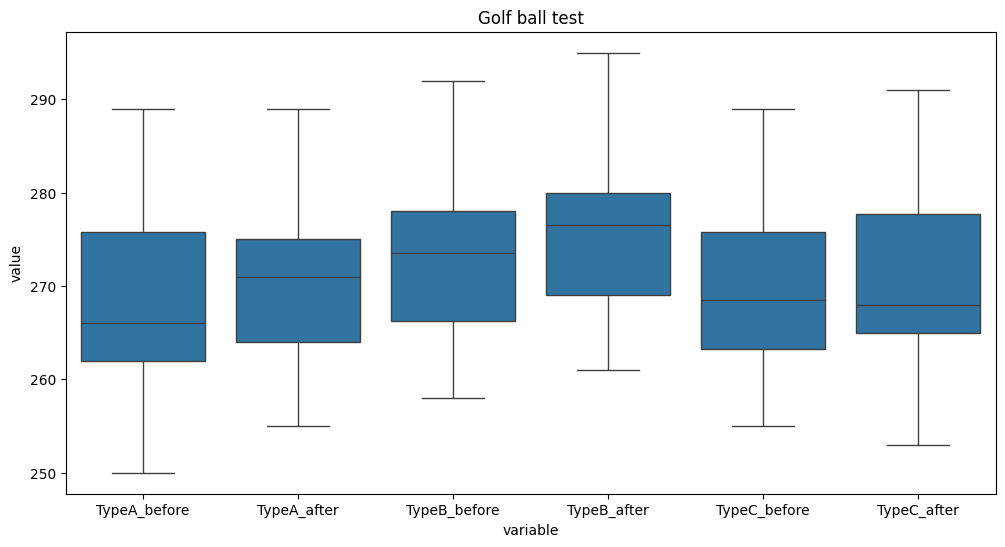

In [23]:
df2 = pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

TypeA_before와 TypeA_after는 중앙값은 차이가 나지만 분포는 유사

# 5. Shapiro-wilk Test 정규성 검정

In [24]:
print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


TypeC_after를 제외하고는 모두 0.05를 초과하기 때문에
정규성을 가지지 않는다는 귀무가설을 기각한다.

따라서 정규성을 만족한다고 할 수 있다.

# 6. bartlett 등분산성 검정

In [25]:
stats.bartlett(df['TypeA_before'],df['TypeA_after'],df['TypeB_before'],df['TypeB_after'],df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

p value는 p-value 값이 0.05 이상으로 나왔기 때문에 등분산

# 7. 대응표본 Z-test

In [27]:
ztest(df['TypeA_before'], x2 = df['TypeA_after'], value=0, alternative='two-sided')
# 'two-sided'로 하여 양측 검정

(-1.2313987682249838, 0.21817375744980994)

 p value가 0.218로 평균 차이가 유의
미하지 않음

# 8. 독립표본 Z-test

In [29]:
# 양측 검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리 검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리 검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


두 집단 간의 유의미한 차이가 있다

더 작은가에 대한 값도 유의미하다

# 9. 대응표본 T-test

In [30]:
scipy.stats.ttest_rel(df['TypeA_before'], df['TypeA_after'])

TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

유의미하지 않다

# 10. 독립표본 T-test

In [31]:
ttest_ind(df['TypeA_before'], df['TypeB_before'], equal_var= False)
# equal_var 옵션으로 False를 설정하여 독립표본인 TypeA 골프공과 TypeB 골프공의
#평균 차이 T-test를 수행

TtestResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285, df=96.23536968302767)

둘 간의 차이가 유의미함